# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import zipfile as zp

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Extract data and read the csv file.

In [3]:
zf = zp.ZipFile("ml_tasks.zip")

In [4]:
df = pd.read_csv(zf.open('ml_tasks/ml_task_1/data.csv',),encoding= 'unicode_escape')

In [5]:
df['CustomerID'].astype('object')

0         17850.0
1         17850.0
2         17850.0
3         17850.0
4         17850.0
           ...   
541904    12680.0
541905    12680.0
541906    12680.0
541907    12680.0
541908    12680.0
Name: CustomerID, Length: 541909, dtype: object

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
df.groupby('CustomerID')['Quantity'].mean()

CustomerID
12346.0     0.000000
12347.0    13.505495
12348.0    75.516129
12349.0     8.643836
12350.0    11.588235
             ...    
18280.0     4.500000
18281.0     7.714286
18282.0     7.538462
18283.0     1.847884
18287.0    22.657143
Name: Quantity, Length: 4372, dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# count and remove null values

In [10]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
df = df[pd.notnull(df['CustomerID'])]

In [12]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [13]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# Creat a new column for the total purchase vale of a indivisual customer.

In [14]:
df['total value']= df['UnitPrice']*df['Quantity']

In [15]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


# Aggrigate the sales amount by the unique customers and count the number of times they palce orde .

In [16]:
df1=df.groupby('CustomerID').agg({'total value': sum,'InvoiceNo':lambda x : x.nunique()})

In [17]:
df1.columns = ['total value','ordercount'] # assign meaningfull names to columns

In [18]:
df1['avg value'] = df1['total value']/df1['ordercount'] #calculate avg order value of a customer.

In [19]:
df1

,total value,ordercount,avg value
CustomerID,,,
12346.0,0.00,2,0.000000
12347.0,4310.00,7,615.714286
12348.0,1797.24,4,449.310000
12349.0,1757.55,1,1757.550000
12350.0,334.40,1,334.400000
...,...,...,...
18280.0,180.60,1,180.600000
18281.0,80.82,1,80.820000
18282.0,176.60,3,58.866667


# Normalize the data so that its distribution will have a mean value of 0 and a standard deviation of 1

In [20]:
df2 = df1.rank(method='first')
normalised_df = (df2-df2.mean())/df2.std()

In [21]:
normalised_df.head()

,total value,ordercount,avg value
CustomerID,,,
12346.0,-1.698182,-0.691236,-1.698182
12347.0,1.479522,1.026356,1.431195
12348.0,0.956639,0.344231,1.149155
12349.0,0.934456,-1.731457,1.702143
12350.0,-0.704704,-1.730664,0.669845


In [22]:
from sklearn.cluster import KMeans

# The elbow method of the K-means clustering algorithm is used to choose the optimum number of clusters

In [23]:
sum_of_sq_distance = []
p = range(1,10)
for k in p:
    km = KMeans(n_clusters = k)
    km.fit(normalised_df[['total value', 'ordercount','avg value']])
    sum_of_sq_distance.append(km.inertia_)

Text(0, 0.5, 'ssd')

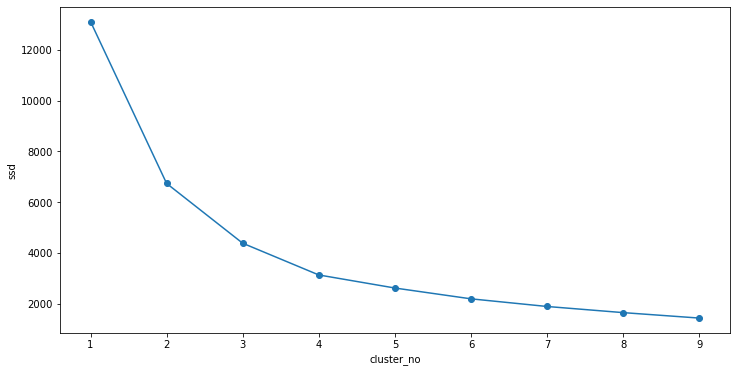

In [24]:
fig = plt.figure(figsize=(12,6))
plt.plot(p,sum_of_sq_distance,marker='o')
plt.xlabel('cluster_no')
plt.ylabel('ssd')

## The image shows 4 clusters as the slope of the curve getting smoother after reaching 4 in x-axies. If we increase the number of clusters to more than 4, there is a very small change in the inertia or sum of the squared distance

In [25]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(normalised_df) #fit data to the model

KMeans(n_clusters=4)

In [26]:
normalised_df['cluster'] = kmeans.labels_ # Assigned specific cluster to each row.

In [27]:
normalised_df.head()

,total value,ordercount,avg value,cluster
CustomerID,,,,
12346.0,-1.698182,-0.691236,-1.698182,0
12347.0,1.479522,1.026356,1.431195,1
12348.0,0.956639,0.344231,1.149155,1
12349.0,0.934456,-1.731457,1.702143,3
12350.0,-0.704704,-1.730664,0.669845,3


In [28]:
df3 = df1

In [29]:
df3['cluster'] = normalised_df['cluster'] #add the cluster column to actual data frame

# Data Visualization

<AxesSubplot:xlabel='cluster', ylabel='total value'>

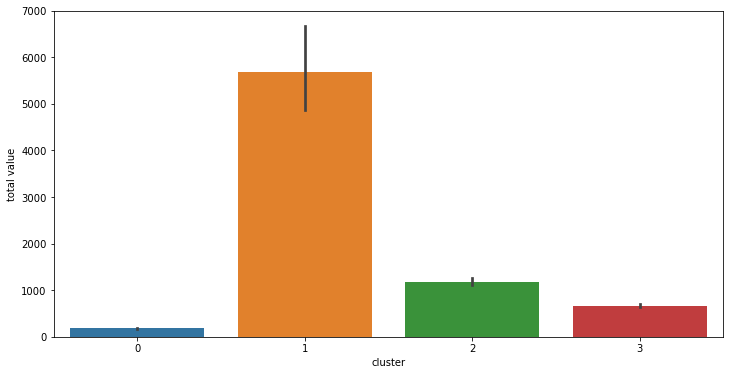

In [30]:
fig = plt.figure(figsize=(12,6))
sns.barplot(x='cluster',y='total value',data=df3)

<AxesSubplot:xlabel='cluster', ylabel='ordercount'>

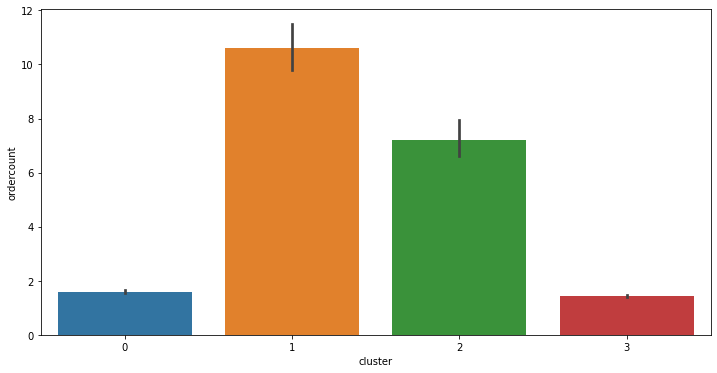

In [31]:
fig = plt.figure(figsize=(12,6))
sns.barplot(x='cluster',y='ordercount',data=df3)

<AxesSubplot:xlabel='cluster', ylabel='avg value'>

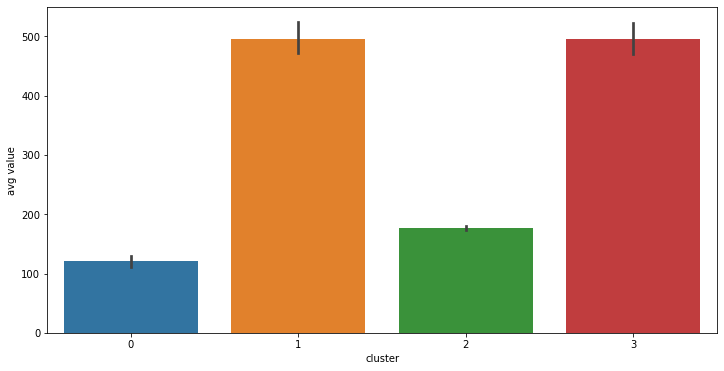

In [32]:
fig = plt.figure(figsize=(12,6))
sns.barplot(x='cluster',y='avg value',data=df3)

<AxesSubplot:xlabel='total value', ylabel='ordercount'>

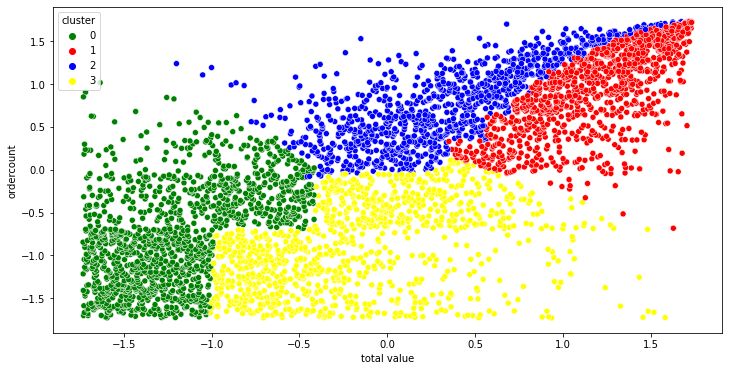

In [33]:
fig = plt.figure(figsize=(12,6))
sns.scatterplot(x='total value',y='ordercount',data=normalised_df,hue='cluster',palette=['green','red','blue','yellow'])

# The customers in red have low total sales and low order count, meaning they are low-value customers. The customers in blue have high total sales and high order counts, indicating they are high-value customers.

<AxesSubplot:xlabel='avg value', ylabel='ordercount'>

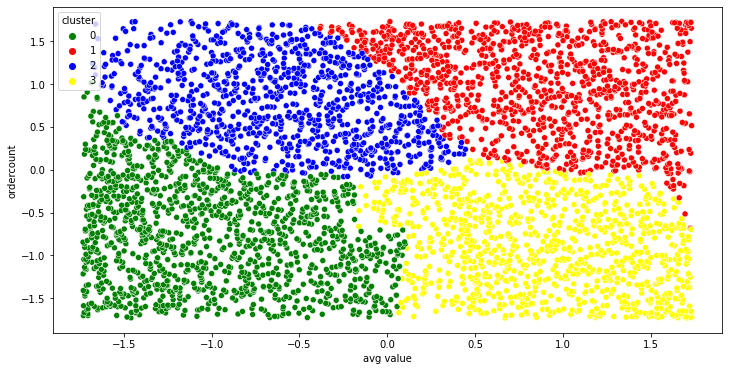

In [34]:
fig = plt.figure(figsize=(12,6))
sns.scatterplot(x='avg value',y='ordercount',data=normalised_df,hue='cluster',palette=['green','red','blue','yellow'])

# The customers in blue have low average order value and low order count, meaning they are low-value customers. The customers in yellow have high average order value and high order counts, indicating they are the highest value customers. The customers in red have a high average order value but a lower-order count, meaning they place fewer orders for higher-priced products.

<AxesSubplot:xlabel='total value', ylabel='avg value'>

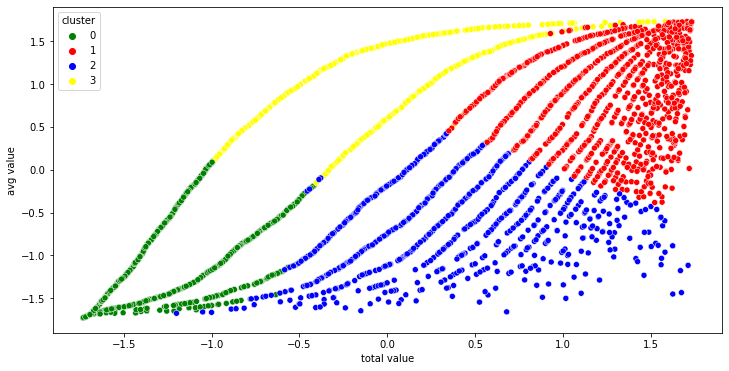

In [35]:
fig = plt.figure(figsize=(12,6))
sns.scatterplot(x='total value',y='avg value',data=normalised_df,hue='cluster',palette=['green','red','blue','yellow'])

# The customers in yellow have high total sales and high average order value, meaning they are the highest value customers. The customers in red have high average order value but lower total sales, meaning they place fewer orders for higher-priced products. The customers in red and blue are high opportunity customers